In [30]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

df= pd.read_csv("combined_dataset.csv")
df.drop(columns=['ranking','isIp','valid'])
df1 = pd.read_csv("All.csv")
labels = ['benign', 'spam']
ndf1 = df1.loc[df1['URL_Type_obf_Type'].isin(labels)]
ndf1['URL_Type_obf_Type'] = ndf1['URL_Type_obf_Type'].map({'benign':1,'spam':2})
ndf1.dropna(inplace=True)

In [31]:
kaggle_df = df
url2016_df= df1
kaggle_df = kaggle_df.sample(frac = 1)

In [32]:
df1

,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,charcompvowels,charcompace,ldl_url,...,SymbolCount_FileName,SymbolCount_Extension,SymbolCount_Afterpath,Entropy_URL,Entropy_Domain,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_Afterpath,URL_Type_obf_Type
0,0,4,5,5.500000,14,4.400000,4,8,3,0,...,1,0,-1,0.726298,0.784493,0.894886,0.850608,NaN,-1.000000,Defacement
1,0,4,5,5.500000,14,6.000000,4,12,4,0,...,0,0,-1,0.688635,0.784493,0.814725,0.859793,0.000000,-1.000000,Defacement
2,0,4,5,5.500000,14,5.800000,4,12,5,0,...,0,0,-1,0.695049,0.784493,0.814725,0.801880,0.000000,-1.000000,Defacement
3,0,4,12,5.500000,14,5.500000,4,32,16,0,...,0,0,-1,0.640130,0.784493,0.814725,0.663210,0.000000,-1.000000,Defacement
4,0,4,6,5.500000,14,7.333334,4,18,11,0,...,0,0,-1,0.681307,0.784493,0.814725,0.804526,0.000000,-1.000000,Defacement
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36702,29,4,14,5.750000,12,3.666667,4,20,24,3,...,3,2,7,0.690555,0.791265,0.777498,0.690227,0.656684,0.796205,spam
36703,0,4,13,3.750000,8,8.461538,4,24,23,0,...,16,15,-1,0.665492,0.820010,0.879588,0.674400,0.674671,-1.000000,spam
36704,58,3,27,6.666666,16,3.375000,3,41,34,20,...,8,7,9,0.656807,0.801139,0.684777,0.713622,0.717187,0.705245,spam
36705,35,3,13,4.333334,9,3.600000,3,15,13,7,...,9,8,3,0.725963,0.897617,0.871049,0.745932,0.758824,0.790772,spam


In [33]:
kaggle_df.head()

,domain,ranking,isIp,valid,activeDuration,urlLen,is@,isredirect,haveDash,domainLen,nosOfSubdomain,label
6748,www.promove.uk.com/blog/wp-admin/maint/paypal....,10000000,0,1,5114,111,0,0,0,18,3,1
24314,us.battle.net-bizzard-d3-com.account-com.net/b...,10000000,0,0,0,67,0,0,1,44,4,1
73040,www.diabeteshelp101.com/login2.paypal.com/encr...,10000000,0,0,0,52,0,0,0,23,2,1
81704,cas-bg.info/paypal.it/confirmation/eeda48df19c...,10000000,0,0,0,68,0,0,1,11,1,1
81034,paypal.com.cgi.bin.webscr.cmd.login.submit.dis...,10000000,0,0,0,91,0,0,0,84,11,1


In [34]:

url2016_df= df1
labels = ['benign', 'spam']
url2016_df = url2016_df.loc[url2016_df['URL_Type_obf_Type'].isin(labels)]
url2016_df['URL_Type_obf_Type'] = url2016_df['URL_Type_obf_Type'].map({'benign':1,'spam':2})
url2016_df.dropna(inplace=True)

In [35]:
base_set_data = kaggle_df[0:len(kaggle_df)//3]
good_update_set = kaggle_df[len(kaggle_df)//3:len(kaggle_df)//3+11323]
bad_update_set = kaggle_df[len(kaggle_df)//3+11323:len(kaggle_df)]


In [36]:
bad_update_set['label']=bad_update_set['label'].map({0:1,1:0})

In [37]:
def model(ndf):
    y= ndf['label']
    x=ndf.drop(columns=['domain','label','ranking','isIp','valid'])
    X_train, X_test, y_train, y_test = train_test_split(x,y,test_size= 0.2,random_state=42)
    classifier = LogisticRegression(random_state=0)
    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    return accuracy_score(y_test, predictions)

def update_model(base, new_data):
    ndf = pd.concat([base,new_data])
    y= ndf['label']
    x=ndf.drop(columns=['domain','label','ranking','isIp','valid'])
    X_train, X_test, y_train, y_test = train_test_split(x,y,test_size= 0.2,random_state=42)
    classifier = LogisticRegression(random_state=0)
    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    return accuracy_score(y_test, predictions)

In [38]:
base= model(base_set_data)
good_data= update_model(base_set_data,good_update_set)

df= pd.concat([base_set_data,good_update_set])
model_with_agg= update_model(good_update_set,df)
bad_data= update_model(bad_update_set,base_set_data)

print('Base Model Acc:',base)
print('Good Data1 Model Acc:',good_data)
print('Adding good1 data to base data then test on good2 data: Model Acc:',model_with_agg)
print('Bad_Data Model Acc:',bad_data)

Base Model Acc: 0.8309352517985612
Good Data1 Model Acc: 0.8399353274050121
Adding good1 data to base data then test on good2 data: Model Acc: 0.8331197363603076
Bad_Data Model Acc: 0.5678567206525594


In [61]:
class Actors:
 
    
    def __init__(self,balance,addr):
        self.weight = 0 #init weights are set to 0
        self.balance = balance #This is the actors init balance
        self.addr = addr
        
        
    def show_weight(self):
        print(self.weight)
    def show_balance(self):
        print(self.balance)
    def get_addr(self):
        return self.addr
    def get_weight(self):
        return(self.weight)
    def get_balance(self):
        return(self.balance)
    def update_weight(self,val):
        self.weight += val
    def update_balance(self,val):
        self.balance += val
    def stake(self,amount):
        self.balance -= amount

    def record(self,data,domain_freq,checkUserData):
        domain_list= list(data['domain'])  
            
        for i in domain_list:
            if i not in domain_freq:
                domain_freq[i] = 0
            else:
                domain_freq[i] += 1
            if self.addr not in checkUserData:
                checkUserData[self.addr] = []
            else:
                checkUserData[self.addr].append(i)

    def simulate(self,base_set,update_set,domain_freq,checkUserData,tag=0):
        balance_list=[]
        prodModel_acc =[]
        prodModel = pd.DataFrame()
        for i in range(0,50):
        
            base = model(base_set)
            # if tag ==1:
            #     update = update_set
            # else:
            update = update_set.sample(1000)
            
            self.record(update,domain_freq,checkUserData)

            new = update_model(base_set,update)
            
            weight = new - base
          
            if weight > 0:# and list(update['domain']) not in list(base_set['domain']):
                prodModel = pd.concat([base_set,update])
                prodModel_acc.append(model(prodModel))
            else:
                prodModel_acc.append(base)

            for j in list(update['domain']):
               
                if j in domain_freq and weight >0 and domain_freq[j] > 0:
                    #print('Initial weight from model:',weight)
                    weight = weight / domain_freq[j]
                    #print('Adjusted based domain freq submitted:',weight)
                # if j in checkUserData[self.addr] and weight > 0:
                #     print('w3',weight)
                #     weight = -weight
                #     print('w4',weight)


            self.update_weight(weight)
       
            
            stake = 1
            self.stake(stake)
    
            reward = stake + (stake*weight) 
            
            if weight < 0:

                self.update_balance(-stake)
        

            else:
                self.update_balance(reward)
            
            
            if self.get_balance() < 0:
                balance_list.append(0)
                continue

            self.update_balance(reward)
         
            balance = self.get_balance()
            balance_list.append(balance)
        return balance_list,prodModel,prodModel_acc



Types of bad actors

1. Giving wrong data on purpose (flip labels) - will always decrease accuracy and they lose stake 

2. Repeat giving the same data point (that you know increases accuracy) - need some way to check for same data from same user
3. Collborating by giving the same data point (that you know increases accuracy) as someone else - ???

4. Giving hardcoded data based on other data that increase acc

In [62]:
domain_freq= dict()
checkUserData = dict()

In [63]:
good = Actors(10,1)
bad_flipped= Actors(10,2)
bad_same_data= Actors(10,3)


good_balance,prodModel,prodModel_acc = good.simulate(base_set_data,good_update_set,domain_freq,checkUserData)
bad_balance,prodModel_bad,prodModel_acc_bad = bad_flipped.simulate(base_set_data,bad_update_set,domain_freq,checkUserData)

In [64]:
prodModel_acc = list(np.array(prodModel_acc) * 100)
good_balance_perc = list((np.array(good_balance) / 10) *100)
bad_balance_perc = list((np.array(bad_balance) / 10) *100)

In [55]:
len(prodModel_acc)

50

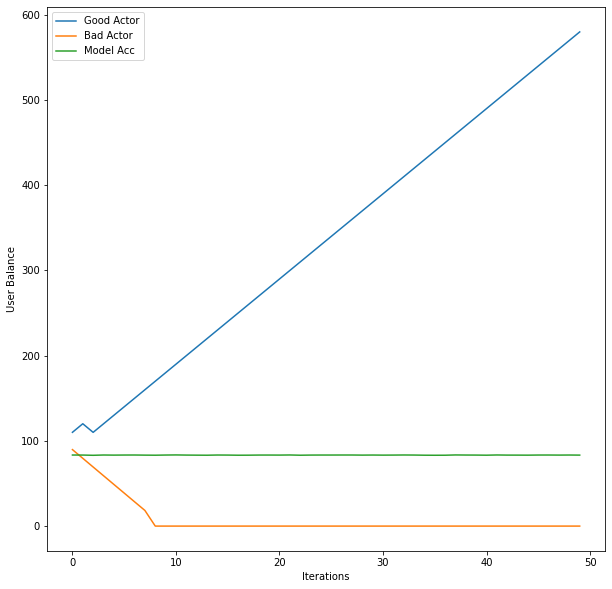

In [70]:
import matplotlib.pyplot as plt
x= [i for i in range(0,50)]
plt.figure(figsize=(10,10))
plt.plot(x,good_balance_perc,label='Good Actor')
plt.plot(x,bad_balance_perc, label='Bad Actor')
plt.plot(x,prodModel_acc, label='Model Acc')
plt.xlabel('Iterations')
plt.ylabel('User Balance')
plt.legend()

In [72]:
prodModel_acc

[83.40915984228087,
 83.36366393691235,
 83.09352517985612,
 83.42432514407037,
 83.30300272975433,
 83.39399454049136,
 83.42432514407037,
 83.28783742796482,
 83.1968456172278,
 83.39399454049136,
 83.5153169548074,
 83.34849863512284,
 83.25750682438581,
 83.18168031543827,
 83.40915984228087,
 83.34849863512284,
 83.18168031543827,
 83.2271762208068,
 83.36366393691235,
 83.37882923870184,
 83.33333333333334,
 83.46982104943889,
 83.18168031543827,
 83.34849863512284,
 83.39399454049136,
 83.39399454049136,
 83.42432514407037,
 83.42432514407037,
 83.30300272975433,
 83.39399454049136,
 83.28783742796482,
 83.34849863512284,
 83.45465574764937,
 83.37882923870184,
 83.1968456172278,
 83.13618441006976,
 83.18168031543827,
 83.5001516530179,
 83.39399454049136,
 83.34849863512284,
 83.21201091901729,
 83.46982104943889,
 83.31816803154382,
 83.30300272975433,
 83.25750682438581,
 83.39399454049136,
 83.40915984228087,
 83.33333333333334,
 83.40915984228087,
 83.30300272975433]

In [80]:

prodModel_acc[-1]

83.30300272975433

# Testing

In [45]:
domain_freq= dict()
domain_list= list(good_update_set['domain'])

In [46]:
for i in domain_list:
    if i not in domain_freq:
        domain_freq[i] = 0
    else:
        domain_freq[i] +=1

In [47]:
domain_freq

{'florimat.com/classe/new/websrc.php?cmd=_login-run&amp;dispatch=5885d80a13c0db1f1ff80d546411d7f84f1036d8f209d3d19ebb6f4eeec8bd0e448e64840cca88eceb1751f740b0e555448e64840cca88eceb1751f740b0e555': 0,
 'www.xjmukang.com/Images/?secure.runescape.com/m=weblogin/loginform.ws?mod=www&amp;tnqwztjamp;ssl=0&amp;dest': 0,
 'www.rexswain.com/perl5.html': 0,
 'sokchea.org/image/start/372bfcaa73dbfe28bff5bc788604084fa/fbec7f2d0e805e753cd98a991011c1c1/': 0,
 'silk-wedding-bouquets.co.uk/js/boaupdate/safe.ssl.confirm.onlinebankingofamerica.com/index.html': 0,
 'www.sunsetsurfers.com/awards/awards.html': 0,
 'alexprinting.lv/redlink.php': 0,
 'tamfideleidademultiplus.site11.com/bonus.tam.fidelidade/': 0,
 'www.red-ring.com/products.htm': 0,
 'www.simtel.net/category.php?id=124': 0,
 'trainedsheepdogs.com/modules/images/': 0,
 'www.07danyahoo.info/page/vote.php?pid=67': 0,
 'painterspaintings.com/P_mindelse-koordinaterne-dk/5c85c385d2505b07f055ccac1b7a6443/': 0,
 'wso.williams.edu/orgs/trivia/local/sup

In [48]:
good = Actors(10,123)

In [49]:
addr= good.get_addr()

In [50]:
checkUserData = dict()

In [51]:
checkUserData[addr]=[]

In [52]:
checkUserData

{123: []}

In [53]:
for i in domain_list:
    checkUserData[addr].append(i)

In [54]:
if 'biphome.spray.se/urbansan/gen_paus/' in checkUserData[addr]:
    print(1)